In [13]:
import pandas as pd
import plotly.graph_objects as go

In [14]:
df = pd.read_csv(r"..\data\processed\df.csv", 
                 index_col=0, 
                 parse_dates=True,
                     dtype={
                        "Open": float,
                        "High": float,
                        "Low": float,
                        "Close": float,
                        "Volume": float,  # ou int, se quiser
                    }).reset_index()
df

,Date,Close,High,Low,Open,Volume
0,2000-01-03,1.156394,1.156394,1.156394,1.156394,3.538944e+10
1,2000-01-04,1.092423,1.092423,1.092423,1.092423,2.886144e+10
2,2000-01-05,1.081400,1.081400,1.081400,1.081400,4.303360e+10
3,2000-01-06,1.077661,1.077661,1.077661,1.077661,3.405568e+10
4,2000-01-07,1.082582,1.082582,1.082582,1.082582,2.091264e+10
...,...,...,...,...,...,...
6468,2025-10-06,30.719999,31.230000,30.700001,31.200001,2.124540e+07
6469,2025-10-07,30.830000,30.860001,30.350000,30.719999,2.906880e+07
6470,2025-10-08,30.650000,31.080000,30.500000,31.080000,1.768740e+07
6471,2025-10-09,30.209999,30.840000,30.190001,30.660000,2.287970e+07


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6473 entries, 0 to 6472
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6473 non-null   datetime64[ns]
 1   Close   6473 non-null   float64       
 2   High    6473 non-null   float64       
 3   Low     6473 non-null   float64       
 4   Open    6473 non-null   float64       
 5   Volume  6473 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 303.5 KB


In [16]:
df.describe()

,Date,Close,High,Low,Open,Volume
count,6473,6473.000000,6473.000000,6473.000000,6473.000000,6.473000e+03
mean,2012-10-16 04:52:32.294145024,7.332898,7.436633,7.235788,7.338602,5.040293e+08
min,2000-01-03 00:00:00,0.861145,0.875661,0.846382,0.866066,0.000000e+00
25%,2006-04-03 00:00:00,2.564264,2.621981,2.517541,2.568671,2.199320e+07
50%,2012-10-02 00:00:00,4.956055,5.042556,4.878423,4.959546,3.463430e+07
75%,2019-04-12 00:00:00,7.726943,7.836888,7.635193,7.747281,5.480150e+07
max,2025-10-10 00:00:00,35.662777,35.810985,35.486780,35.690561,7.356416e+10
std,NaN,7.816397,7.896714,7.737540,7.817367,3.719583e+09


In [17]:
df.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

<Axes: >

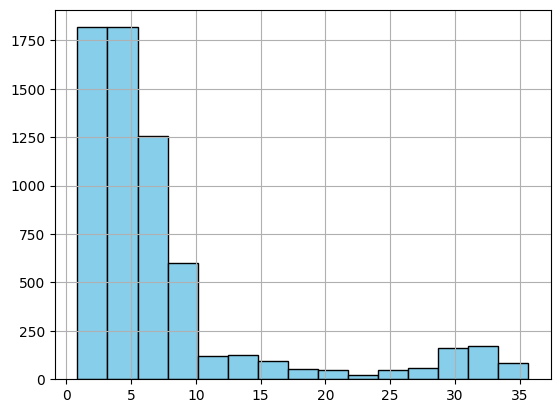

In [18]:
df['Close'].hist(bins=15, color='skyblue', edgecolor='black')

In [19]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

In [20]:
df.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [21]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=df['Date'],
        y=df['Volume'],
        name='Volume',
        marker_color='blue'
    )
)

fig.update_layout(
    title='Volume por Data',
    xaxis_title='Data',
    yaxis_title='Volume',
    template='plotly_white'
)

fig.show()


In [22]:
# Filtra a partir de julho de 2000 por problema no volume
df = df[df['Date'] >= '2000-07-01']

In [23]:
# Agrupa por mês usando pd.Grouper e soma o volume
df_monthly = df.groupby(pd.Grouper(key='Date', freq='ME'))['Volume'].sum().reset_index()
df_monthly.rename(columns={'Volume': 'Volume_Sum'}, inplace=True)
df_monthly

,Date,Volume_Sum
0,2000-07-31,8.185696e+08
1,2000-08-31,1.772378e+09
2,2000-09-30,6.919072e+08
3,2000-10-31,7.715776e+08
4,2000-11-30,6.390816e+08
...,...,...
299,2025-06-30,8.791368e+08
300,2025-07-31,5.521236e+08
301,2025-08-31,7.044772e+08
302,2025-09-30,6.376416e+08


In [24]:
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=df['Date'],
        y=df['Volume'],
        name='Volume',
        marker_color='red'
    )
)

fig.update_layout(
    title='Volume em 2000',
    xaxis_title='Data',
    yaxis_title='Volume',
    template='plotly_white'
)

fig.show()